## Traffic Lights Attention

In [1]:
%pylab inline
import os
import imageio
import matplotlib 
import numpy as np
from scipy import ndimage
import scipy.ndimage.filters as filters
import cv2 

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


In [2]:
# img = imageio.imread('CityScapes\leftImg8bit\train\aachen_000149_000019_leftImg8bit.png')
dir=r"C:\Users\RENT\m\CityScapes\leftImg8bit\train\erfurt"
path_img1=os.path.join(dir, "erfurt_000015_000019_leftImg8bit.png")
path_img2=os.path.join(dir, "erfurt_000007_000019_leftImg8bit.png")
path_img3=os.path.join(dir, "erfurt_000008_000019_leftImg8bit.png")

img1=cv2.imread(path_img1)/255
img2=cv2.imread(path_img2)/255
img3=cv2.imread(path_img3)/255


### high pass filter

In [3]:
def high_pass_filter(img):
    highpass_filter = np.array([[-1/9, -1/9, -1/9],
                   [-1/9,  8/9, -1/9],
                   [-1/9, -1/9, -1/9]])

    return ndimage.convolve((img[:,:,1]), highpass_filter)#filter on the red image



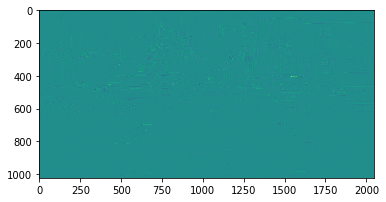

In [4]:
highpass_filter = high_pass_filter(img1)
imshow(highpass_filter)


### Finding local maximum

In [5]:
def drow_local_maximum(img):
  
    highpass_filter=high_pass_filter(img)
    img_maximum = filters.maximum_filter(highpass_filter,35)
    
    plt.figure(figsize=(10,5))
    image_coordinates=img.copy()
    image_coordinates[img_maximum>img[:,:,1]]=[0,1,0]

    imshow(image_coordinates)
    

# testing

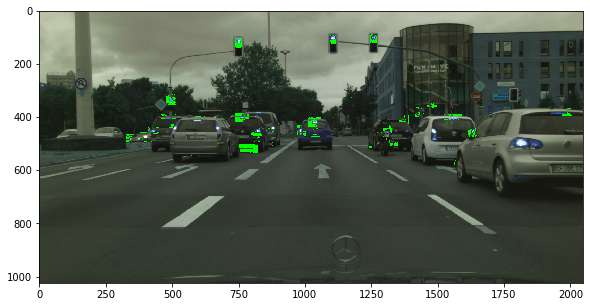

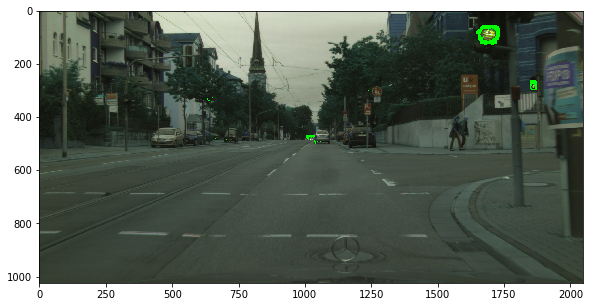

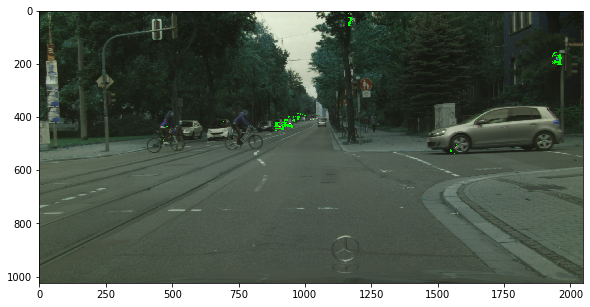

In [6]:
drow_local_maximum(img1)
drow_local_maximum(img2)
drow_local_maximum(img3)

# testing random image

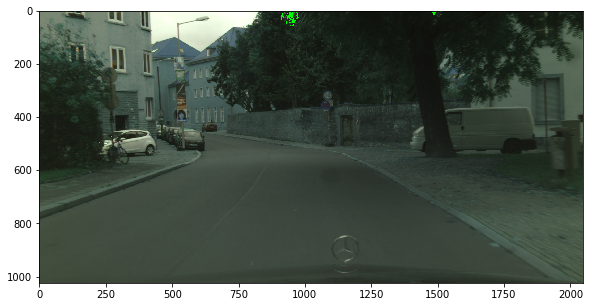

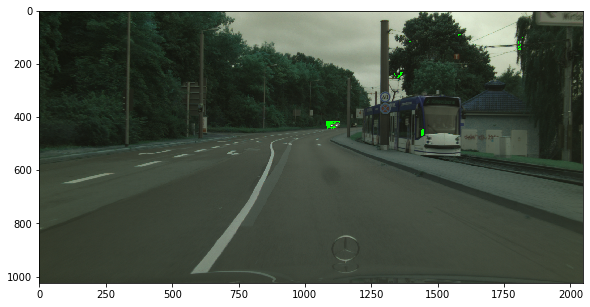

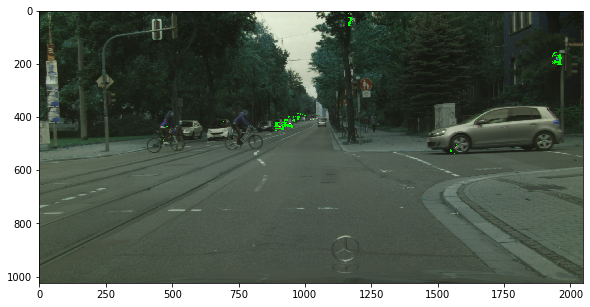

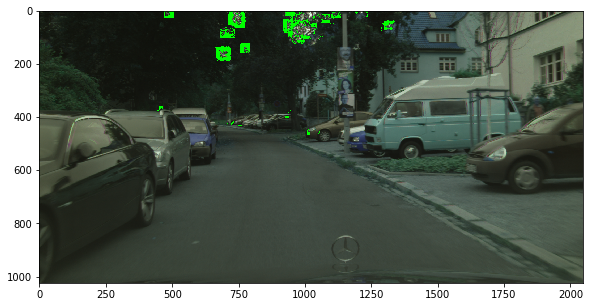

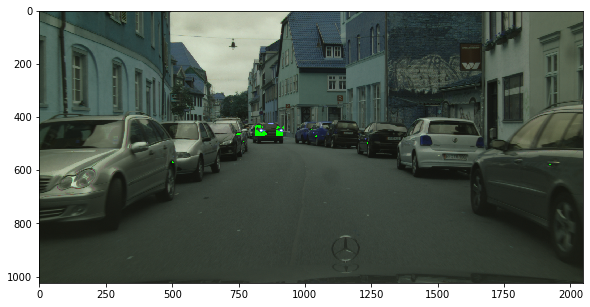

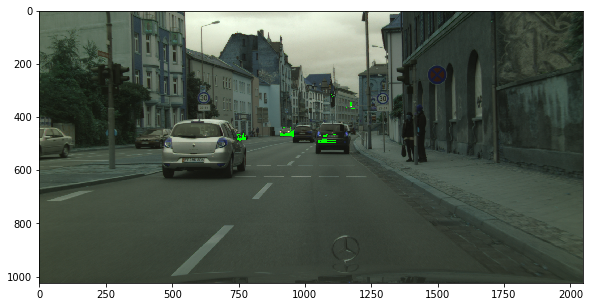

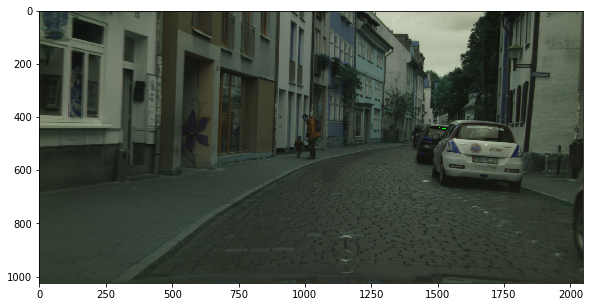

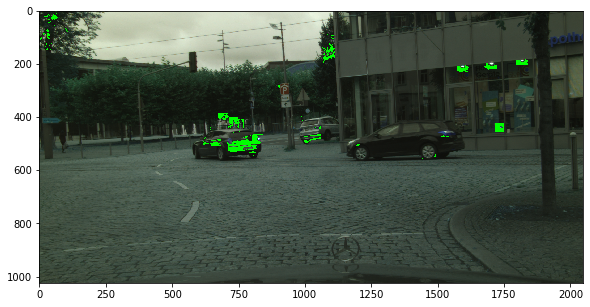

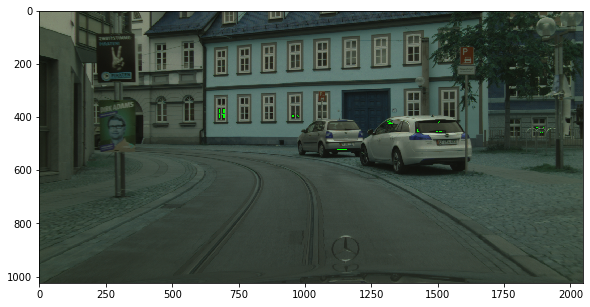

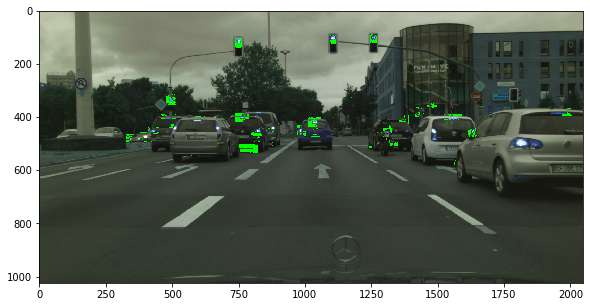

In [7]:
dir=r"C:\Users\RENT\m\CityScapes\leftImg8bit\train\erfurt"

for i in range(10):
    random_file=random.choice(os.listdir(dir)) #random file from dir
    path_img=os.path.join(dir, random_file)
    img=cv2.imread(path_img)/255
    drow_local_maximum(img)